Searching NASA Horizons for '10'... 
Found: Sun (10) 
Searching NASA Horizons for '399'... 
Found: Earth (399) 
Searching NASA Horizons for '301'... 
Found: Moon (301) 
Searching NASA Horizons for 'James Webb Space Telescope'... 
Found: James Webb Space Telescope (spacecraft) (-170) 
Searching NASA Horizons for '-92'... 
Found: ACE (spacecraft) (-92) 
Searching NASA Horizons for '31'... 
Found: SEMB-L1 (31) 
Searching NASA Horizons for '32'... 
Found: SEMB-L2 (32) 


Widget(N=7, count=2, height=200.0, orbit_data=b'\x15\xccB6$\x1c[\xb5\xe9G\xea-b\xcb\x7f?\x19\xaa\x84<\xb5C\x8d…

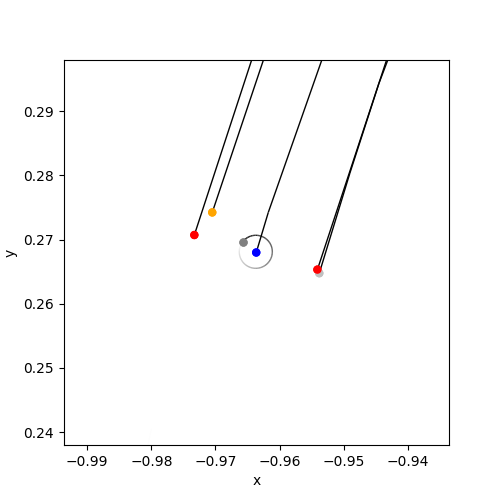

In [15]:
%matplotlib widget
import rebound

sim = rebound.Simulation()
sim.getWidget()

zoom=0.03

sim.add("10") #Sonne -> nicht Sichtbar aufgrund des Zooms auf die Erde
sim.add("399") #Erde (blauer Punkt)
sim.add("301", primary=sim.particles[1]) #Mond (dunkel grauer Punkt)

sim.add("James Webb Space Telescope") #JWST -> Langrange Punkt 2 (orangener Punkt)
sim.add("-92") #ACE Spacecraft -> Lagrange Punkt 1 (hell grauer Punkt)

#roter Punkte
sim.add("31") #L1 Sonne-Erde
sim.add("32") #L2 Sonne-Erde


ob1 = rebound.OrbitPlot(sim, particles = [1,3,4,5,6], xlim=(sim.particles[1].x-0.03, sim.particles[1].x+0.03), ylim=(sim.particles[1].y-0.03,sim.particles[1].y+0.03))
ob2 = rebound.OrbitPlot(sim, particles = [2], primary=1, show_primary=False, fig=ob1.fig, ax = ob1.ax)

ob1.particles.set_color(["blue", "orange", "silver", "red", "red"])
ob2.particles.set_color(["grey"])

sim.move_to_com()

w = sim.getWidget()
w

In [16]:
fig = ob1.fig
for i in range(50):
    sim.move_to_com()
    
    ob1.sim.integrate(sim.t+0.01)
    ob2.sim.integrate(sim.t+0.01)

    ob1.xlim = [sim.particles[1].x-zoom, sim.particles[1].x+zoom]
    ob1.ylim = [sim.particles[1].y-zoom, sim.particles[1].y+zoom]

    ob1.update()
    ob2.update()

    fig.canvas.draw()
    w